In [ ]:
# Here we just looking how we are going to do end to end machine learning project
# 1. Process + EDA + Feature Selection
# 2. Extract input and output columns
# 3. Scale the values
# 4. Train / Test split
# 5. Evaluate the model / Model Selection
# 6. Deploy the model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/placement.csv")

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df = df.iloc[:,1:]
# Preprocessing

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

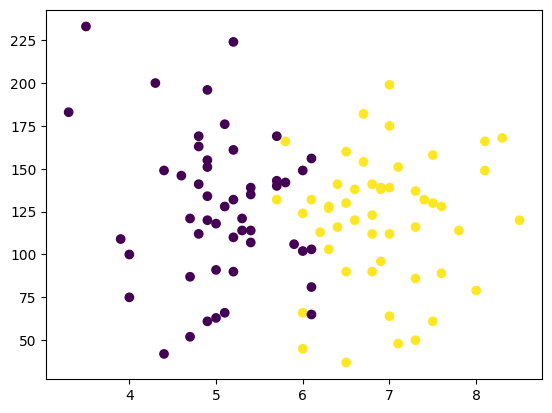

In [ ]:
# EDA
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
# here yellow dots means the placement is done and black dots means the placement is not done

In [ ]:
# 2. Extracting input and output columns
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
x.shape

(100, 2)

In [ ]:
y.shape

(100,)

In [ ]:
# 4. Performing the Train / Test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
89,4.9,151.0
61,7.3,137.0
92,5.2,110.0
36,5.7,140.0
76,4.9,155.0
...,...,...
67,5.0,118.0
79,6.5,90.0
94,4.7,52.0
93,6.8,112.0


In [ ]:
y_train

89    0
61    1
92    0
36    0
76    0
     ..
67    0
79    1
94    0
93    1
10    1
Name: placement, Length: 90, dtype: int64

In [ ]:
X_test

,cgpa,iq
59,4.8,112.0
50,3.5,233.0
66,6.9,96.0
48,6.6,138.0
14,6.1,103.0
19,5.2,132.0
23,4.7,87.0
77,7.3,50.0
58,8.0,79.0
71,6.1,132.0


In [ ]:
y_test

59    0
50    0
66    1
48    1
14    0
19    0
23    0
77    1
58    1
71    1
Name: placement, dtype: int64

In [ ]:
# We are scaling the data between -1 to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Creating object

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-9.82483672e-01,  6.85496182e-01],
       [ 1.16328451e+00,  3.24708718e-01],
       [-7.14262649e-01, -3.71095678e-01],
       [-2.67227612e-01,  4.02020317e-01],
       [-9.82483672e-01,  7.88578315e-01],
       [ 3.58621442e-01,  4.27790851e-01],
       [-1.16129769e+00, -8.76198128e-02],
       [-9.82483672e-01, -1.63385180e+00],
       [-7.14262649e-01,  9.43201514e-01],
       [-8.03669657e-01,  9.27739194e-02],
       [-5.35448634e-01,  2.73167652e-01],
       [ 8.95063487e-01, -3.19554611e-01],
       [-1.87655375e+00, -3.96866211e-01],
       [ 5.37435457e-01, -1.13390346e-01],
       [-6.24855642e-01, -2.68013545e-01],
       [ 7.16249472e-01, -8.86506341e-01],
       [ 1.43150553e+00, -9.12276874e-01],
       [ 2.69214434e-01, -5.51489410e-01],
       [ 9.93411195e-04,  6.33955116e-01],
       [ 4.48028449e-01,  1.44314986e-01],
       [-8.03669657e-01,  1.32975951e+00],
       [ 1.34209852e+00,  1.44314986e-01],
       [ 1.79807426e-01, -2.93784078e-01],
       [-2.

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[-1.07189068, -0.31955461],
       [-2.23418178,  2.7986799 ],
       [ 0.80565648, -0.73188314],
       [ 0.53743546,  0.35047925],
       [ 0.09040042, -0.55148941],
       [-0.71426265,  0.19585605],
       [-1.16129769, -0.96381794],
       [ 1.16328451, -1.91732767],
       [ 1.78913356, -1.16998221],
       [ 0.09040042,  0.19585605]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
# Model training
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Evaluate the model
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

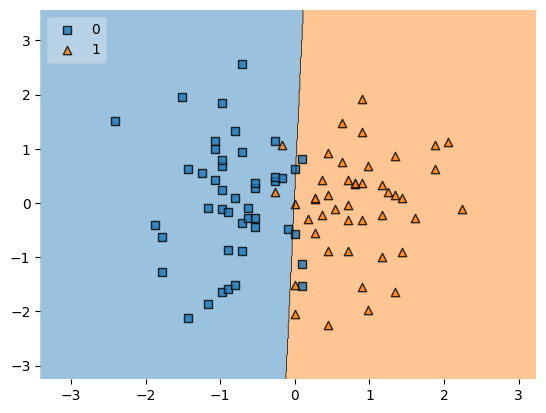

In [ ]:
plot_decision_regions(X_train,y_train.values,clf = clf,legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
# Here we can see model.pkl is our model
# So we can take this model and can deploy it anywhere or in the website where we want to do the prediction.